# TASK DONE BY <font color='RED'>   RAJAAMANI.P </font> 

# Prediction using Supervised ML (Level - Beginner)


# Linear Regression with Python Scikit Learn

In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

### Simple Linear Regression

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

### Problem statement

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.


### To predict:
What will be predicted score if a student studies for 9.25 hrs/ day?

### AUTHOR: RAJAAMANI.P

### Importing all libraries required in this notebook

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

### Reading data from remote link

In [2]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Discover and visualize the data to gain insights

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


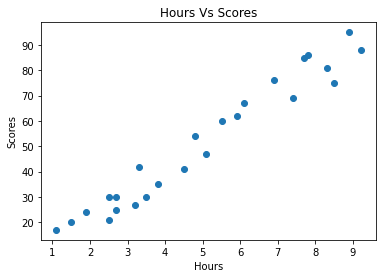

In [6]:
plt.scatter(x=data.Hours,y=data.Scores)
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Hours Vs Scores")
plt.show()

#### From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.


### Prepare The Data For Machine Learning Algorithm

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs). and spliting that data into training and test sets.


In [7]:
# Data Cleaning 
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [8]:
# split dataset for training
x=data.drop("Scores", axis="columns")
y=data.drop("Hours",axis="columns")
print("shape of x",x.shape)
print("shape of y", y.shape)

shape of x (25, 1)
shape of y (25, 1)


In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.25, random_state=123) 
# tes_size is defining how much data we want for testing so 0.25 means i am using 25 percent data for testing

In [10]:
print("shape of X Train",X_train.shape)
print("shape of Y Train",Y_train.shape)
print("shape of X Test", X_test.shape)
print("shape of Y Test",Y_test.shape)

shape of X Train (18, 1)
shape of Y Train (18, 1)
shape of X Test (7, 1)
shape of Y Test (7, 1)


### Select a model and train it

In [11]:
# So in above scatter plot as we saw that when the value of x is increasing the value of y is also increasing in a linear format so we can use linear regression model
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [12]:
lr.fit(X_train,Y_train)

LinearRegression()

In [13]:
lr.coef_

array([[9.61718609]])

In [14]:
lr.intercept_

array([2.44861787])

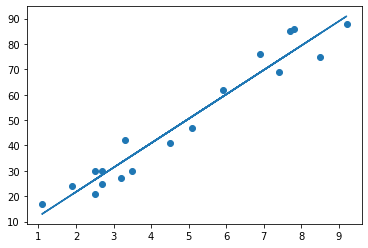

In [15]:
# Plotting the regression line # formula for line is y=m*x + c
line = lr.coef_*X_train+lr.intercept_

# Plotting for the test data
plt.scatter(X_train,Y_train)
plt.plot(X_train, line);
plt.show()

### Making Predictions
Now that we have trained our algorithm, it's time to make some predictions.


In [16]:
pr=lr.predict(X_test)

In [17]:
y_pred=lr.predict(X_test)
y_pred

array([[16.87439701],
       [48.61111111],
       [38.99392502],
       [61.11345303],
       [88.04157409],
       [82.27126244],
       [55.34314138]])

In [18]:
pd.DataFrame(np.c_[X_test,Y_test,y_pred],
             columns=["study_hours","student_marks_original","student_marks_predicted"])

,study_hours,student_marks_original,student_marks_predicted
0,1.5,20.0,16.874397
1,4.8,54.0,48.611111
2,3.8,35.0,38.993925
3,6.1,67.0,61.113453
4,8.9,95.0,88.041574
5,8.3,81.0,82.271262
6,5.5,60.0,55.343141


### Evaluating the model
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [19]:
from sklearn.metrics import mean_squared_error

In [20]:
mean_squared_error(Y_test,pr,squared=False)

4.797834650875306

## Solution

In [21]:
hour =[9.25]
own_pr=lr.predict([hour])
print("No of Hours = {}".format([hour]))
print("Predicted Score = {}".format(own_pr[0]))

No of Hours = [[9.25]]
Predicted Score = [91.40758922]


# Predicted Score = 91.40758922